In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf

In [ ]:
import os
for dirname, _, filenames in os.walk('D:\Data\DataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
# plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['ps.useafm'] = True
import random
random.seed(21)
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',200)
pd.set_option('display.width',400)

In [ ]:
df=pd.read_csv('mitbih_train.csv',header=None)
print(df.shape)
df.tail()

(87554, 188)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   \
87549 0.81 0.49 0.54 0.53 0.49 0.48 0.46 0.40 0.28 0.14 0.05 0.14 0.12 0.09 0.14 0.16 0.11 0.14 0.14 0.13 0.15 0.16 0.16 0.17 0.15 0.18 0.16 0.15 0.18 0.19 0.20 0.21 0.22 0.22 0.26 0.28 0.29 0.30 0.30 0.32 0.31 0.29 0.29 0.28 0.27 0.29 0.26 0.26 0.27 0.26 0.25 0.27 0.26 0.26 0.25 0.27 0.26 0.26 0.25 0.25 0.24 0.25 0.23 0.24 0.24 0.24 0.24 0.24 0.21 0.24 0.22 0.22 0.22 0.22 0.21 0.22 0.21 0.23   
87550 0.72 0.61 0.49 0.36 0.23 0.12 0.05 0.00 0.00 0.01 0.08 0.18 0.28 0.31 0.36 0.43 0.48 0.53 0.54 0.56 0.58 0.59 0.60 0.60 0.61 0.62 0.64 0.65 0.67 0.68 0.70 0.71 0.74 0.76 0.79 0.81 0.83 0.86 0.88 0.88 0.88 0.87 0.84 0.81 0.76 0.71 0.67 0.62 0.59 0.55 0.52 0.52 0.51 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.50 0.48 0.48 0.49 0.48 0.48 0.49 0.49 0.49 0.48 0.48 0.48 0.48 0.47   
87551 0.91 0.62 0.60 0.58 0.53 0.48 0.44 0.39 0.32 0.19 0.10 0.05 0.04 0.05 0.05 0.10 0.18 0.27 0.35 0.41 0.44 0.47 0.48 0.52 0.53 0.53 0.56 0.59 0.63 0.63 0.62 0.62 0.62 0.61 0.61 0.62 0.63 0.62 0.63 0.64 0.64 0.64 0.65 0.66 0.67 0.68 0.69 0.69 0.68 0.69 0.69 0.69 0.69 0.68 0.67 0.65 0.63 0.62 0.60 0.59 0.58 0.57 0.55 0.54 0.53 0.53 0.51 0.51 0.50 0.50 0.50 0.48 0.48 0.47 0.48 0.47 0.48 0.47   
87552 0.86 0.65 0.85 0.25 0.17 0.13 0.12 0.12 0.12 0.10 0.10 0.10 0.09 0.08 0.07 0.07 0.07 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.02 0.00 0.01 0.01 0.00 0.01 0.01 0.02 0.04 0.04 0.05 0.06 0.07 0.09 0.10 0.11 0.11 0.13 0.13 0.14 0.13 0.13 0.13 0.13 0.13 0.12 0.13 0.13 0.12 0.13 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.13 0.13 0.13 0.13 0.13 0.12 0.12 0.12 0.13 0.13 0.14 0.14 0.15 0.15   
87553 0.90 0.85 0.80 0.75 0.69 0.60 0.51 0.43 0.40 0.40 0.37 0.29 0.24 0.32 0.40 0.41 0.41 0.39 0.39 0.42 0.44 0.49 0.54 0.57 0.58 0.59 0.60 0.61 0.62 0.63 0.65 0.66 0.68 0.69 0.71 0.73 0.74 0.75 0.76 0.76 0.77 0.76 0.75 0.73 0.72 0.69 0.67 0.64 0.62 0.60 0.58 0.56 0.55 0.54 0.53 0.52 0.53 0.52 0.52 0.51 0.52 0.51 0.51 0.51 0.52 0.52 0.53 0.52 0.53 0.52 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53   

       78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  \
87549 0.21 0.21 0.21 0.21 0.20 0.21 0.20 0.21 0.21 0.21 0.21 0.22 0.21 0.24 0.25 0.43 1.00 0.51 0.53 0.55 0.57 0.55 0.54 0.44 0.32 0.19 0.00 0.07 0.11 0.13 0.16 0.22 0.15 0.13 0.12 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
87550 0.48 0.48 0.48 0.47 0.47 0.47 0.47 0.47 0.47 0.47 0.48 0.47 0.47 0.47 0.48 0.47 0.48 0.49 0.50 0.56 0.92 1.00 0.84 0.76 0.67 0.56 0.47 0.36 0.23 0.14 0.08 0.05 0.04 0.05 0.08 0.16 0.25 0.28 0.33 0.38 0.44 0.48 0.52 0.55 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
87551 0.47 0.45 0.46 0.46 0.44 0.44 0.44 0.45 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.43 0.44 0.43 0.45 0.44 0.47 0.51 0.91 1.00 0.64 0.61 0.58 0.55 0.50 0.45 0.40 0.33 0.24 0.11 0.05 0.00 0.00 0.02 0.04 0.09 0.18 0.29 0.39 0.44 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
87552 0.16 0.16 

In [ ]:
df_test=pd.read_csv('mitbih_test.csv',header = None)
print(df_test.shape)
df_test.head()

(21892, 188)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   \
0 1.00 0.76 0.11 0.00 0.08 0.08 0.07 0.05 0.05 0.04 0.03 0.03 0.04 0.03 0.04 0.04 0.04 0.05 0.05 0.05 0.07 0.07 0.08 0.10 0.12 0.13 0.17 0.20 0.21 0.24 0.25 0.26 0.29 0.27 0.27 0.24 0.21 0.17 0.16 0.12 0.12 0.11 0.11 0.10 0.11 0.10 0.11 0.10 0.11 0.11 0.12 0.11 0.12 0.11 0.12 0.11 0.11 0.11 0.12 0.11 0.11 0.10 0.10 0.09 0.09 0.08 0.08 0.08 0.08 0.07 0.08 0.07 0.08 0.07 0.07 0.07 0.07 0.07 0.09   
1 0.91 0.78 0.53 0.36 0.37 0.34 0.33 0.31 0.30 0.30 0.30 0.34 0.38 0.39 0.44 0.45 0.46 0.48 0.51 0.53 0.59 0.59 0.60 0.63 0.62 0.58 0.56 0.52 0.49 0.49 0.47 0.45 0.45 0.47 0.45 0.43 0.42 0.41 0.39 0.37 0.37 0.37 0.32 0.31 0.33 0.31 0.32 0.32 0.34 0.34 0.33 0.30 0.31 0.28 0.27 0.29 0.26 0.27 0.28 0.27 0.28 0.29 0.29 0.29 0.29 0.29 0.29 0.28 0.27 0.26 0.25 0.22 0.22 0.24 0.22 0.27 0.42 0.58 0.62   
2 0.73 0.21 0.00 0.12 0.10 0.10 0.11 0.12 0.12 0.13 0.11 0.14 0.13 0.15 0.13 0.15 0.13 0.15 0.12 0.16 0.14 0.14 0.13 0.15 0.13 0.15 0.12 0.12 0.10 0.09 0.07 0.08 0.07 0.07 0.08 0.09 0.09 0.08 0.08 0.09 0.09 0.11 0.11 0.12 0.10 0.12 0.12 0.14 0.13 0.15 0.15 0.17 0.16 0.16 0.17 0.17 0.16 0.18 0.19 0.20 0.18 0.20 0.19 0.20 0.19 0.21 0.20 0.21 0.21 0.23 0.24 0.28 0.31 0.39 0.45 0.43 0.37 0.36 0.27   
3 1.00 0.91 0.68 0.47 0.23 0.07 0.00 0.00 0.01 0.05 0.10 0.12 0.15 0.17 0.17 0.17 0.17 0.16 0.16 0.15 0.15 0.15 0.15 0.15 0.14 0.14 0.15 0.16 0.17 0.18 0.19 0.21 0.22 0.24 0.26 0.28 0.29 0.31 0.32 0.33 0.34 0.35 0.35 0.35 0.35 0.35 0.35 0.34 0.34 0.34 0.34 0.34 0.34 0.34 0.36 0.36 0.36 0.35 0.36 0.36 0.34 0.30 0.29 0.27 0.27 0.26 0.26 0.26 0.27 0.26 0.26 0.27 0.27 0.27 0.28 0.27 0.28 0.28 0.28   
4 0.57 0.40 0.24 0.15 0.00 0.00 0.04 0.08 0.07 0.09 0.08 0.10 0.09 0.12 0.10 0.13 0.12 0.16 0.17 0.19 0.20 0.26 0.28 0.33 0.35 0.40 0.41 0.46 0.45 0.45 0.40 0.37 0.31 0.30 0.27 0.27 0.26 0.27 0.26 0.28 0.27 0.30 0.29 0.32 0.31 0.34 0.33 0.35 0.33 0.35 0.34 0.35 0.35 0.37 0.36 0.36 0.35 0.37 0.35 0.39 0.38 0.40 0.39 0.42 0.40 0.41 0.39 0.39 0.35 0.36 0.33 0.36 0.31 0.35 0.32 0.33 0.31 0.31 0.30   

   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  \
0 0.10 0.11 0.11 0.12 0.12 0.11 0.10 0.10 0.10 0.09 0.07 0.07 0.05 0.06 0.05 0.06 0.05 0.06 0.05 0.05 0.00 0.01 0.19 0.68 0.98 0.62 0.04 0.01 0.09 0.07 0.07 0.05 0.04 0.04 0.03 0.04 0.04 0.05 0.04 0.05 0.04 0.05 0.05 0.06 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.62 0.76 0.86 1.00 0.91 0.67 0.32 0.15 0.12 0.10 0.04 0.02 0.02 0.03 0.00 0.01 0.03 0.01 0.02 0.04 0.09 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.22 0.18 0.19 0.19 0.19 0.19 0.23 0.18 0.23 0.67 1.00 0.46 0.19 0.20 0.21 0.19 0.21 0.19 0.19 0.19 0.21 0.21 0.22 0.21 0.23 0.22 0.23 0.23 0.23 0.23 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [ ]:
df[187] = df[187].astype('int64')
target_col = df[187]
df_test[187] = df_test[187].astype('int64')
test_target_col = df_test[187]
labels =  ['Normal Beat','Supraventricular premature beat','Premature\nventricular contraction','Fusion of ventricular and normal beat','Unclassified']

In [ ]:
pd.Series(np.bincount(target_col),index=labels)

Normal Beat                              72471
Supraventricular premature beat           2223
Premature\nventricular contraction        5788
Fusion of ventricular and normal beat      641
Unclassified                              6431
dtype: int64

In [ ]:
target_col

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int64

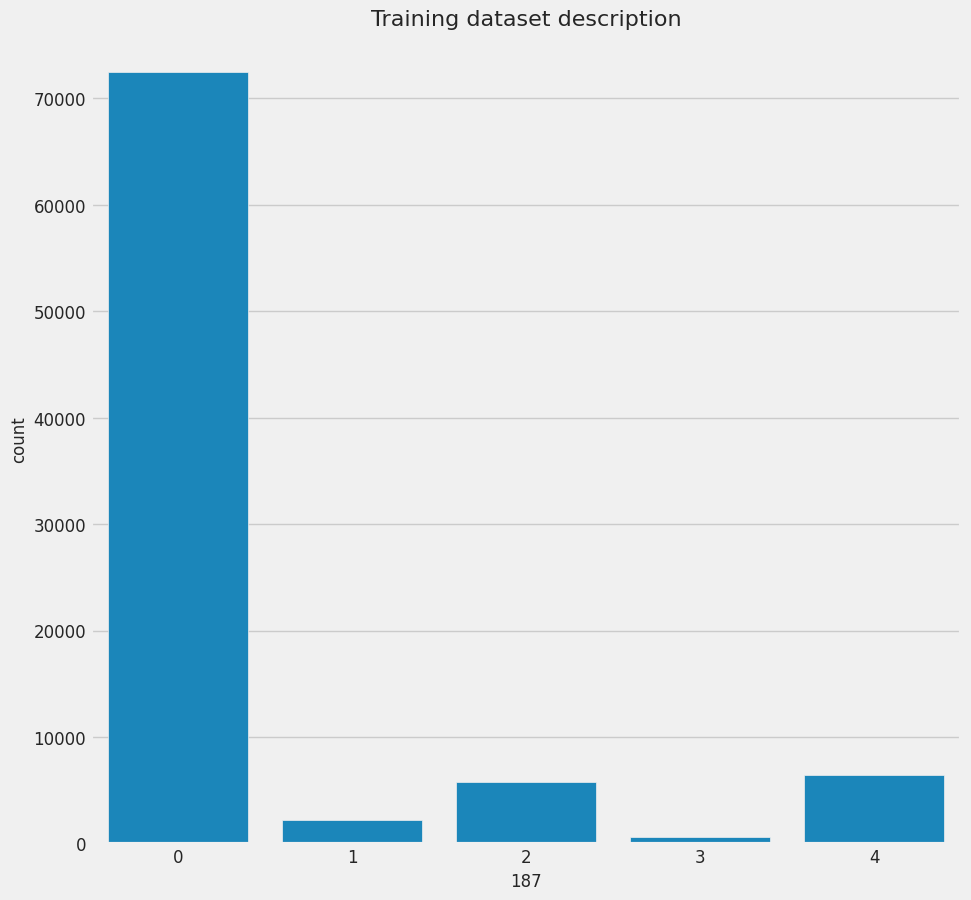

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df[187])
plt.title("Training dataset description",fontsize=16)
plt.savefig('TrainingDataSet.png')

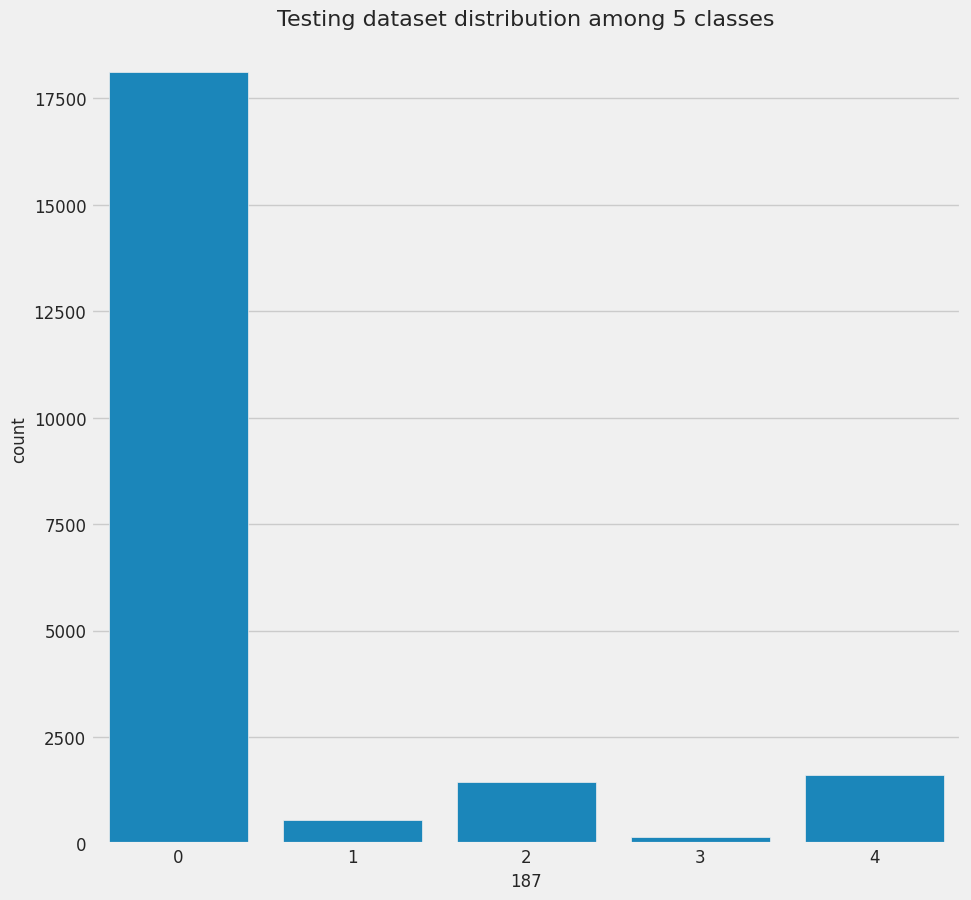

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_test[187])
plt.title("Testing dataset distribution among 5 classes",fontsize=16)
plt.savefig('TestingDataSet.png')

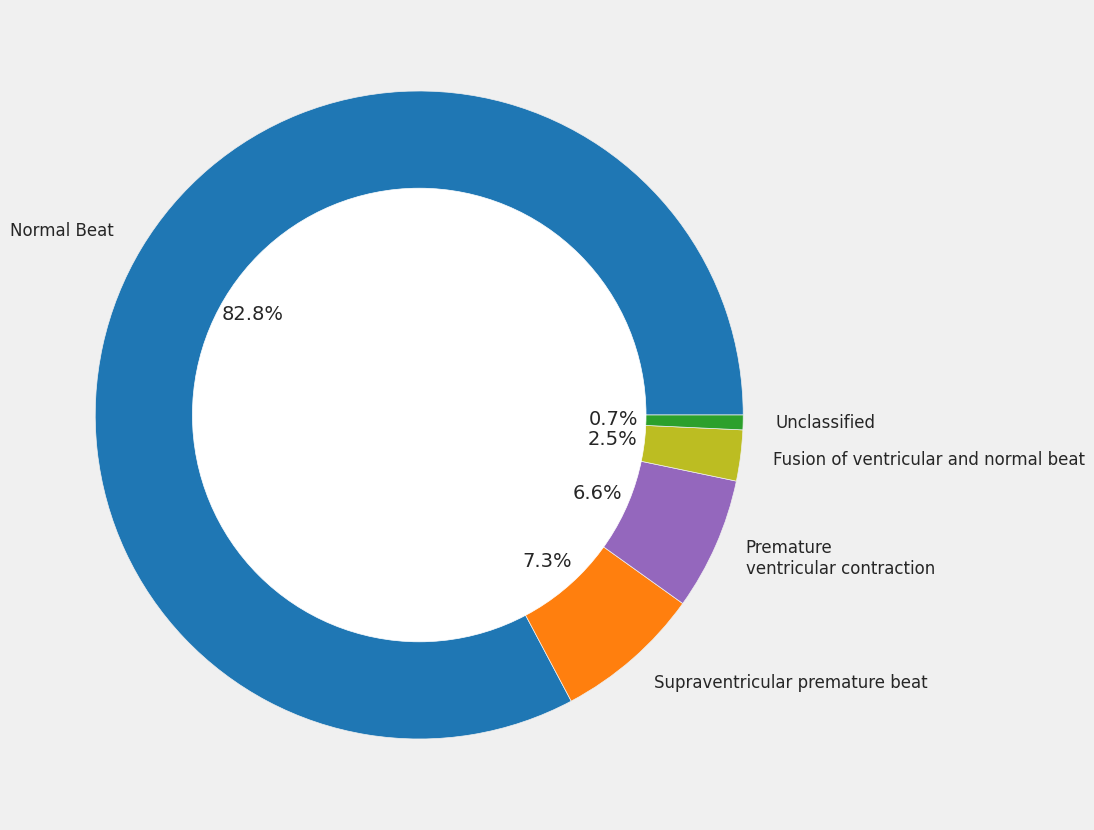

In [ ]:
# from sklearn.utils import resample
# df_1=df[df[187]==1]
# df_2=df[df[187]==2]
# df_3=df[df[187]==3]
# df_4=df[df[187]==4]
# df_0=(df[df[187]==0]).sample(n=20000,random_state=42)

# df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
# df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
# df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
# df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

# df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
# representation of classes % wise
per_class = df[187].value_counts()
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=labels, colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('BalancedDataSet.png')

In [ ]:
pd.Series(np.bincount(test_target_col),index=labels)

Normal Beat                              18118
Supraventricular premature beat            556
Premature\nventricular contraction        1448
Fusion of ventricular and normal beat      162
Unclassified                              1608
dtype: int64

In [ ]:
X = df.drop(187,axis=1)
y = df[187]
print(X.shape)
print(y.shape)
x_test = df_test.drop(187,axis=1)
y_test = df_test[187].astype('int64')
print(x_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [ ]:
C0 = (target_col==0)
C1 = (target_col==1)
C2 = (target_col==2)
C3 = (target_col==3)
C4 = (target_col==4)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y.values,random_state=42,stratify=y.values,shuffle=True,train_size=0.90)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(78798, 187) (78798,)
(8756, 187) (8756,)


In [ ]:
pd.Series(np.bincount(y_train),index=labels)

Normal Beat                              65223
Supraventricular premature beat           2001
Premature\nventricular contraction        5209
Fusion of ventricular and normal beat      577
Unclassified                              5788
dtype: int64

In [ ]:
pd.Series(np.bincount(y_val),index=labels)

Normal Beat                              7248
Supraventricular premature beat           222
Premature\nventricular contraction        579
Fusion of ventricular and normal beat      64
Unclassified                              643
dtype: int64

In [ ]:
pd.Series(np.bincount(y_test),index=labels)

Normal Beat                              18118
Supraventricular premature beat            556
Premature\nventricular contraction        1448
Fusion of ventricular and normal beat      162
Unclassified                              1608
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = np.expand_dims(x_train,2)
x_val = np.expand_dims(x_val,2)
x_test = np.expand_dims(x_test,2)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(78798, 187, 1) (78798, 5)
(8756, 187, 1) (8756, 5)
(21892, 187, 1) (21892, 5)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation, Dropout, BatchNormalization,ZeroPadding1D,AveragePooling1D
from keras import backend as K
from keras import Sequential
from keras.initializers import glorot_uniform

In [ ]:
n_obs, feature , depth = x_train.shape
batch_size = 256

In [ ]:
def identity_block(X,f,filters,stage,block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'


    F1,F2,F3 = filters
    X_shortcut = X


    X = Conv1D(filters=F1,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2a',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)


    X = Conv1D(filters=F2,kernel_size=1,strides=1,padding='same',name = conv_name_base+'2b',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)


    X = Conv1D(filters=F3,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2c',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2c')(X)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1,F2,F3 = filters
    X_shortcut = X
    X = Conv1D(filters=F1,kernel_size=1,strides=s,padding='valid',name = conv_name_base+'2a',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2,kernel_size=f,strides=1,padding='same',name = conv_name_base+'2b',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2c',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2c')(X)

    X_shortcut = Conv1D(filters=F3,kernel_size=1,strides=s,padding='valid',name =conv_name_base+'1',kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet(input_shape=(feature,depth)):
    X_input = Input(input_shape)
    X = ZeroPadding1D(3)(X_input)
    X = Conv1D(64,7,strides=2,name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3,strides=2)(X)

    X = convolutional_block(X,f=3,filters=[128,128,256],stage=2,block='a',s=1)
    X = identity_block(X,3,[128,128,256],stage=2,block='b')
    X = identity_block(X,3,[128,128,256],stage=2,block='c')

    X = convolutional_block(X,f=3,filters=[128,128,512],stage=3,block='a',s=2)
    X = identity_block(X,3,[128,128,512],stage=3,block='b')
    X = identity_block(X,3,[128,128,512],stage=3,block='c')
    X = identity_block(X,3,[128,128,512],stage=3,block='d')

    X = convolutional_block(X,f=3,filters=[256,256,1024],stage=4,block='a',s=2)
    X = identity_block(X,3,[256,256,1024],stage=4,block='b')
    X = identity_block(X,3,[256,256,1024],stage=4,block='c')
    X = identity_block(X,3,[256,256,1024],stage=4,block='d')
    X = identity_block(X,3,[256,256,1024],stage=4,block='e')
    X = identity_block(X,3,[256,256,1024],stage=4,block='f')

    X = convolutional_block(X,f=3,filters=[512,512,2048],stage=5,block='a',s=2)
    X = identity_block(X,3,[512,512,2048],stage=5,block='b')
    X = identity_block(X,3,[512,512,2048],stage=5,block='c')

    X = AveragePooling1D(pool_size = 2,padding='same')(X)

    model = Model(inputs=X_input,outputs=X,name='ResNet')

    return model

In [ ]:
base_model = ResNet(input_shape=(feature,depth))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu',name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(128, activation='relu',name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(5, activation='softmax',name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input,outputs=headModel)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 187, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 193, 1)         │              0 │ input_layer[0][0]      │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 94, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 94, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 94, 64)         │              0 │ bn_conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 46, 64)         │              0 │ activation[0][0]       │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 46, 128)        │          8,320 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 46, 128)        │            512 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 46, 128)        │              0 │ bn2a_branch2a[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 46, 128)        │         49,280 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 46, 128)        │            512 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 46, 128)        │              0 │ bn2a_branch2b[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 46, 256)        │         33,024 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 46, 256)        │         16,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 46, 256)        │          1,024 │ res2a_branch2c[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch1              │ (None, 46, 256)        │          1,024 │ res2a_branch1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 15,971,333 (60.93 MB)

 Trainable params: 15,917,445 (60.72 MB)

 Non-trainable params: 53,888 (210.50 KB)

In [ ]:
from keras.metrics import AUC, Accuracy

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(name="auc"), 'accuracy'])

In [ ]:
import keras

h = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20, batch_size=batch_size,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
        keras.callbacks.ModelCheckpoint('./model_{val_accuracy:.3f}.h5',
                                        save_best_only=True, save_weights_only=False,
                                        monitor='val_accuracy', mode='max')
    ]
)


Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9093 - auc: 0.9728 - loss: 0.1539

308/308 ━━━━━━━━━━━━━━━━━━━━ 149s 248ms/step - accuracy: 0.9094 - auc: 0.9728 - loss: 0.1537 - val_accuracy: 0.8278 - val_auc: 0.9037 - val_loss: 0.2864
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9713 - auc: 0.9934 - loss: 0.0392

308/308 ━━━━━━━━━━━━━━━━━━━━ 75s 136ms/step - accuracy: 0.9713 - auc: 0.9934 - loss: 0.0392 - val_accuracy: 0.9677 - val_auc: 0.9940 - val_loss: 0.0422
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9756 - auc: 0.9950 - loss: 0.0310

308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.9756 - auc: 0.9950 - loss: 0.0310 - val_accuracy: 0.9726 - val_auc: 0.9957 - val_loss: 0.0370
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9799 - auc: 0.9960 - loss: 0.0261

308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.9799 - auc: 0.9960 - loss: 0.0261 - val_accuracy: 0.9842 - val_auc: 0.9958 - val_loss: 0.0227
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9813 - auc: 0.9966 - loss: 0.0241 - val_accuracy: 0.9768 - val_auc: 0.9942 - val_loss: 0.0306
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9815 - auc: 0.9963 - loss: 0.0241 - val_accuracy: 0.9758 - val_auc: 0.9956 - val_loss: 0.0300
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9788 - auc: 0.9957 - loss: 0.0306

308/308 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9788 - auc: 0.9957 - loss: 0.0306 - val_accuracy: 0.9845 - val_auc: 0.9953 - val_loss: 0.0246
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9848 - auc: 0.9971 - loss: 0.0195

308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.9848 - auc: 0.9971 - loss: 0.0195 - val_accuracy: 0.9861 - val_auc: 0.9968 - val_loss: 0.0186
Epoch 9/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 81s 133ms/step - accuracy: 0.9876 - auc: 0.9979 - loss: 0.0157 - val_accuracy: 0.9858 - val_auc: 0.9965 - val_loss: 0.0189
Epoch 10/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.9878 - auc: 0.9977 - loss: 0.0155 - val_accuracy: 0.9860 - val_auc: 0.9965 - val_loss: 0.0188
Epoch 11/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9888 - auc: 0.9982 - loss: 0.0138 - val_accuracy: 0.9854 - val_auc: 0.9968 - val_loss: 0.0184
Epoch 12/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9882 - auc: 0.9981 - loss: 0.0141 - val_accuracy: 0.9845 - val_auc: 0.9958 - val_loss: 0.0219
Epoch 13/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9889 - auc: 0.9980 - loss: 0.0136 - val_accuracy: 0.9861 - val_auc: 0.9961 - val_loss: 0.0207
Epoch 14/20
308/308 ━━━━━━━━━

308/308 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9893 - auc: 0.9983 - loss: 0.0133 - val_accuracy: 0.9869 - val_auc: 0.9960 - val_loss: 0.0208
Epoch 16/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9909 - auc: 0.9985 - loss: 0.0113

308/308 ━━━━━━━━━━━━━━━━━━━━ 83s 137ms/step - accuracy: 0.9909 - auc: 0.9985 - loss: 0.0113 - val_accuracy: 0.9892 - val_auc: 0.9970 - val_loss: 0.0160
Epoch 17/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.9896 - auc: 0.9985 - loss: 0.0120 - val_accuracy: 0.9866 - val_auc: 0.9967 - val_loss: 0.0180
Epoch 18/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 133ms/step - accuracy: 0.9912 - auc: 0.9985 - loss: 0.0105 - val_accuracy: 0.9861 - val_auc: 0.9965 - val_loss: 0.0192
Epoch 19/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9906 - auc: 0.9985 - loss: 0.0111 - val_accuracy: 0.9810 - val_auc: 0.9947 - val_loss: 0.0494
Epoch 20/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.9905 - auc: 0.9986 - loss: 0.0114 - val_accuracy: 0.9852 - val_auc: 0.9959 - val_loss: 0.0207


In [ ]:
# Extract the highest accuracy from training history
best_accuracy = max(h.history['accuracy'])  # If you want training accuracy
best_val_accuracy = max(h.history.get('val_accuracy', [0]))  # For validation accuracy

print(f"Highest Training Accuracy: {best_accuracy:.4f}")
print(f"Highest Validation Accuracy: {best_val_accuracy:.4f}")


Highest Training Accuracy: 0.9910
Highest Validation Accuracy: 0.9892


In [ ]:
h.history.keys()

dict_keys(['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss'])

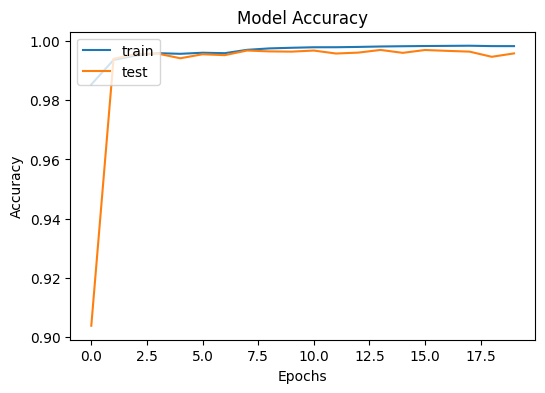

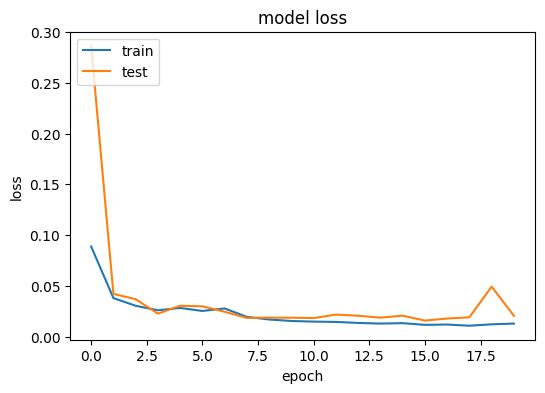

In [ ]:
plt.style.use("default")
plt.figure(figsize=(6,4))
plt.plot(h.history['auc'])
plt.plot(h.history['val_auc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.figure(figsize=(6,4))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step


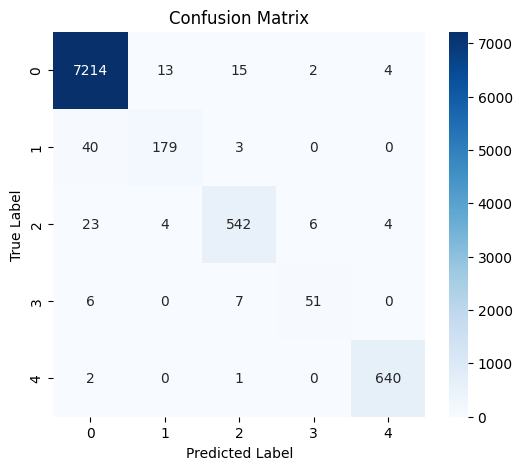

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions (probabilities)
y_pred_probs = model.predict(x_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Pick class with highest probability
y_true = np.argmax(y_val, axis=1)  # Convert one-hot encoded y_val to labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Print Metrics
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")

✅ Accuracy: 0.9852
✅ F1-Score: 0.9849
✅ Precision: 0.9848
✅ Recall: 0.9852
